In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [70]:
# import danych
d = pd.read_excel("dane.xlsx")

In [71]:
d.head()

,id,id_osoby,grupa,log_abstr,zadanie,poprawnosc,czas,cieplo
0,1,1,30s,log,1,t,300,0.0
1,2,1,30s,abstr,2,n,300,-4.0
2,3,1,30s,log,3,t,300,-7.5
3,4,1,30s,abstr,4,n,225,4.0
4,5,2,30s,log,1,n,300,31.0


In [72]:
d.grupa.value_counts()

30s          48
dowol        48
kontrolna    48
Name: grupa, dtype: int64

In [73]:
d.log_abstr.value_counts()

abstr    72
log      72
Name: log_abstr, dtype: int64

In [74]:
# zamień t na 1, n na 0
d.loc[:, 'poprawnosc'] = d.poprawnosc.replace({'t': 1, 'n': 0})

In [75]:
d = d.rename({'czas ': 'czas'}, axis='columns')


## Hipoteza:
Osoby niezobowiązane do określania „poczucia ciepła” lepiej i szybciej rozwiążą zadania, niż osoby zobowiązane do określania „poczucia ciepła”.

#### Średnie

In [76]:
gr = d.groupby(['grupa', 'log_abstr'])

In [77]:
round(gr.poprawnosc.mean(), 2)

grupa      log_abstr
30s        abstr        0.50
           log          0.54
dowol      abstr        0.50
           log          0.54
kontrolna  abstr        0.46
           log          0.67
Name: poprawnosc, dtype: float64

In [78]:
round(gr.czas.mean(), 2)

grupa      log_abstr
30s        abstr        237.50
           log          275.08
dowol      abstr        259.71
           log          279.58
kontrolna  abstr        238.29
           log          267.21
Name: czas, dtype: float64

#### Odchylenia

In [79]:
round(gr.poprawnosc.std(), 2)

grupa      log_abstr
30s        abstr        0.51
           log          0.51
dowol      abstr        0.51
           log          0.51
kontrolna  abstr        0.51
           log          0.48
Name: poprawnosc, dtype: float64

In [80]:
round(gr.czas.std(), 2)

grupa      log_abstr
30s        abstr        93.63
           log          48.19
dowol      abstr        78.16
           log          49.73
kontrolna  abstr        93.45
           log          44.27
Name: czas, dtype: float64

# Wykresy

Poniżej wykresy gotowe do wklejenia do artykułu. Pliki png w wysokiej rozdzielczości w załączniku.

### Poprawność

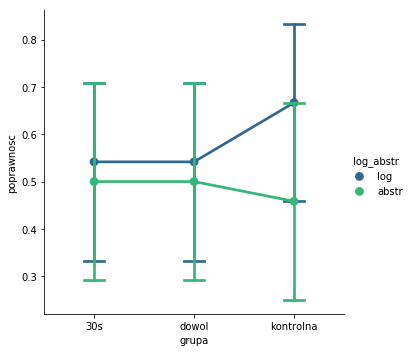

In [81]:
sns.catplot(x='grupa', y='poprawnosc',hue='log_abstr', data=d,
            kind='point', capsize=.2, palette='viridis')
plt.savefig('poprawnosc.png', dpi=150)

### Czas

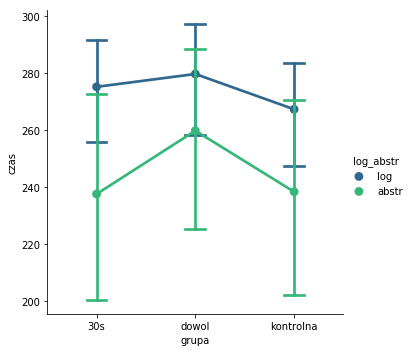

In [82]:
sns.catplot(x='grupa', y='czas',hue='log_abstr', data=d,
            kind='point', capsize=.2, palette='viridis')
plt.savefig('czas.png', dpi=150)

# ANOVA 2x2

W poniższych tabelach przedstawione są efekty głowne (grupa i logiczność/abstrakcyjność) i efekt interakcji dla każdej z badanych zmiennych zależnych. Kolumna df mówi o stopniach swobody, F o wartości statystyki F a PR(>F) to wasz poziom istotności p. Jeśli p jest mniejsze niż 0.05, mówimy że dany efekt jest _istotny statystycznie_.

W rozdziale wynikowym opiszcie wszystkie średnie (patrz wyżej), pokażcie wszystkie wykresy, a w tekście dla każdego efektu dopiszcie opis, wg poniższego schematu:

> Efekt główny/interakcji ZN na ZZ okazał się istotny/nieistotny statystycznie; F(_df_, _dfR_) = _F_, p < PR(>F).

Gdzie _df_ bierzecie z kolumny `df` a _dfR_ to `df` dla `Residual`. Czyli przykładowo dla poprawności:

> Efekt główny grupy dla oceny poprawności okazał się nieistotny statystycznie; F(1, 138) = 0,109, p > 0,05. Efekt główny logiczności/abstrakcyjności dla oceny poprawności okazał się nieistotny statystycznie; F(1, 138) = 1,333, p > 0,05. Efekt interakcji grupy i logiczności/abstrakcyjności okazał się nieistotny statystycznie; F(1, 138) = 0,436, p > 0,05.

### Poprawność

In [83]:
form = 'poprawnosc ~ grupa + log_abstr + grupa:log_abstr'
model = smf.ols(formula=form, data=d).fit()          
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
grupa,0.055556,2.0,0.108876,0.896919
log_abstr,0.340278,1.0,1.333728,0.250139
grupa:log_abstr,0.222222,2.0,0.435503,0.647825
Residual,35.208333,138.0,NaN,NaN


### Czas

In [84]:
form = 'czas ~ grupa + log_abstr + grupa:log_abstr'
model = smf.ols(formula=form, data=d).fit()          
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
grupa,7621.541667,2.0,0.753048,0.472854
log_abstr,29842.562500,1.0,5.897203,0.016452
grupa:log_abstr,1881.791667,2.0,0.185931,0.830539
Residual,698343.541667,138.0,NaN,NaN


# Hipoteza: 

#### *„Poczucie ciepła”* wzrasta, kiedy człowiek zbliża się do rozwiązania zadania.

(to nie jest już plan eksperymentalny, ponieważ nie manipulowaliśmy tym. Zrobiłem zwykły test t, porównując poczucie ciepła dla prób, w których badany rozwiązał prawidłowo zadanie i w których mu się to nie udało.

#### Boxplot

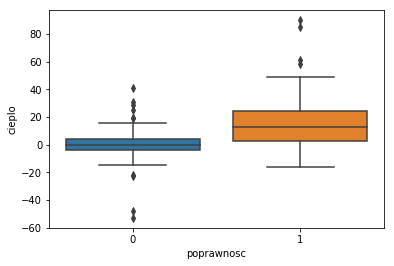

In [89]:
# wywal kontrolę
bk = d.loc[d.grupa != 'kontrolna', :]
sns.boxplot(x='poprawnosc', y='cieplo', data=bk)
plt.savefig('cieplo.png', dpi=150)

### Test t

Test t Studenta odpowiada nam na pytanie, czy istnieją istotne statystycznie różnice pomiędzy średnimi. W tym przypadku udało się wykryć różnice pomiędzy średnimi. Opisując wyniki należy po podaniu wartości śrendnich i odchyleń standardowych napisać coś takiego (oczywiście uzupełnijcie ZZ i ZN).

> Różnice w ZZ pod względem ZN okazały się istotne statystycznie; t = -4,440 ; p < 0,001.

In [86]:
from scipy import stats

In [87]:
res = stats.ttest_ind(bk.loc[bk['poprawnosc'] == 0, 'cieplo'],
               bk.loc[bk['poprawnosc'] == 1, 'cieplo'])

In [88]:
print('t =', round(res[0], 3), '; p = ', round(res[1], 3))

t = -4.44 ; p =  0.0
